In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('./data/gameranking.csv')

In [7]:
df.head()

,platform,title,developer,score,num_of_reviews
0,XONE,Resident Evil 2,Capcom R&D Division 1/Capcom,94.44,9
1,PC,Sekiro: Shadows Die Twice,From Software/Activision,93.40,5
2,PS4,Resident Evil 2,Capcom R&D Division 1/Capcom,92.39,41
3,PS4,NieR: Automata - Game of the YoRHa Edition,PlatinumGames/Square Enix,90.88,8
4,NS,Iconoclasts,MP2 Games/Limited Run Games,90.83,6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 5 columns):
platform          263 non-null object
title             263 non-null object
developer         263 non-null object
score             263 non-null float64
num_of_reviews    263 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ KB


In [9]:
df['platform'].unique()

array(['XONE', 'PC', 'PS4', 'NS', '3DS', 'WIIU', 'VITA', 'PS3', 'X360',
       'IOS'], dtype=object)

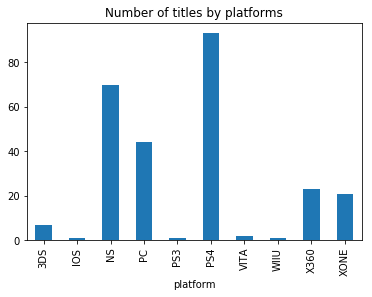

In [30]:
df.groupby(['platform']).count()['title'].plot.bar()
plt.title('Number of titles by platforms')
plt.savefig('./figures/gameranking/numTitlesByPlatforms.png', bbox_inches='tight')

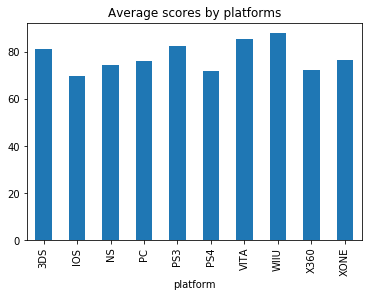

In [31]:
df.groupby(['platform']).mean()['score'].plot.bar()
plt.title('Average scores by platforms')
plt.savefig('./figures/gameranking/averageScoresByPlatforms.png', bbox_inches='tight')

In [12]:
def get_verdict(x):
    if x >= 90:
        return 'Very good'
    elif x >= 75:
        return 'Good'
    elif x >= 60:
        return 'Average'
    elif x >= 45:
        return 'Bad'
    else:
        return "Very bad"

df['verdict'] = df['score'].apply(get_verdict)

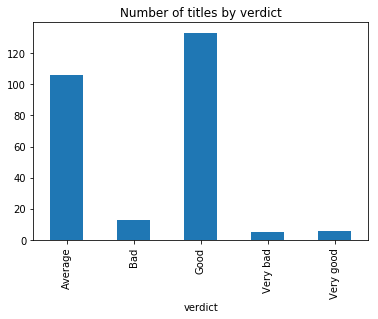

In [32]:
df.groupby(['verdict']).count()['title'].plot.bar()
plt.title('Number of titles by verdict')
plt.savefig('./figures/gameranking/numTitlesByVerdict.png', bbox_inches='tight')

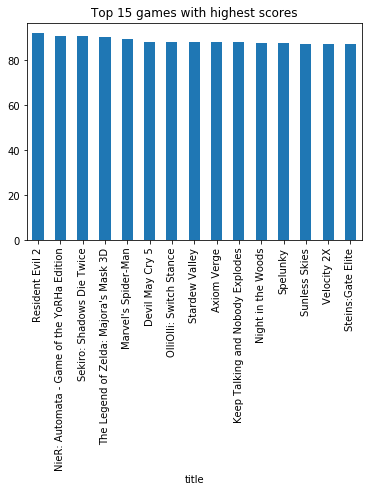

In [33]:
df.groupby(['title']).mean()['score'].sort_values(ascending=False).head(15).plot.bar()
plt.title('Top 15 games with highest scores')
plt.savefig('./figures/gameranking/top15games.png', bbox_inches='tight')